# <center>Iris Flower Species Classification</center>

Dataset - https://archive.ics.uci.edu/ml/datasets/Iris<br>
<br>Characteristics of the dataset-</br>
<br>i) 4 attributes + Id number</br>
<br>ii) 150 data points</br>
<br>iii) zero missing data</br><br>
<br>Target Variable - 'Species'</br><br>
<br>Column names - i)   Id</br>
<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;ii)  SepalLengthCm</br>
<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;iii) SepalWidthCm</br>
<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;iv)  PetalLengthCm</br>
<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;v)   PetalWidthCm</br>
<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;vi)  Species</br><br>
<br>Species types under 'Species'- Iris-setosa</br>
<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;-Iris-versicolor</br>
<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;-Iris-virginica</br><br>
<br>Objective - Accurate Prediction of species type given a new data point</br>

Models - Decision Tree Classification, KNN Classification

## Initial Analysis

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

### Loading Data and Data summary

In [2]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.drop('Id',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
categ=LabelEncoder()
df['Species_type']=categ.fit_transform(df['Species'])

## Data visualisation for Analysis

### Box Plot

array([[<AxesSubplot:title={'center':'PetalLengthCm'}, xlabel='[Species_type]'>,
        <AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='[Species_type]'>],
       [<AxesSubplot:title={'center':'SepalLengthCm'}, xlabel='[Species_type]'>,
        <AxesSubplot:title={'center':'SepalWidthCm'}, xlabel='[Species_type]'>]],
      dtype=object)

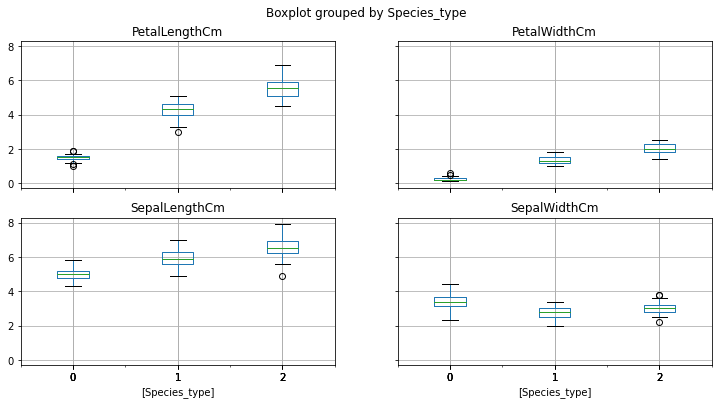

In [6]:
df.boxplot(by="Species_type", figsize=(12, 6))

### Pair plot analysis

In [7]:
import warnings
warnings.filterwarnings('ignore')

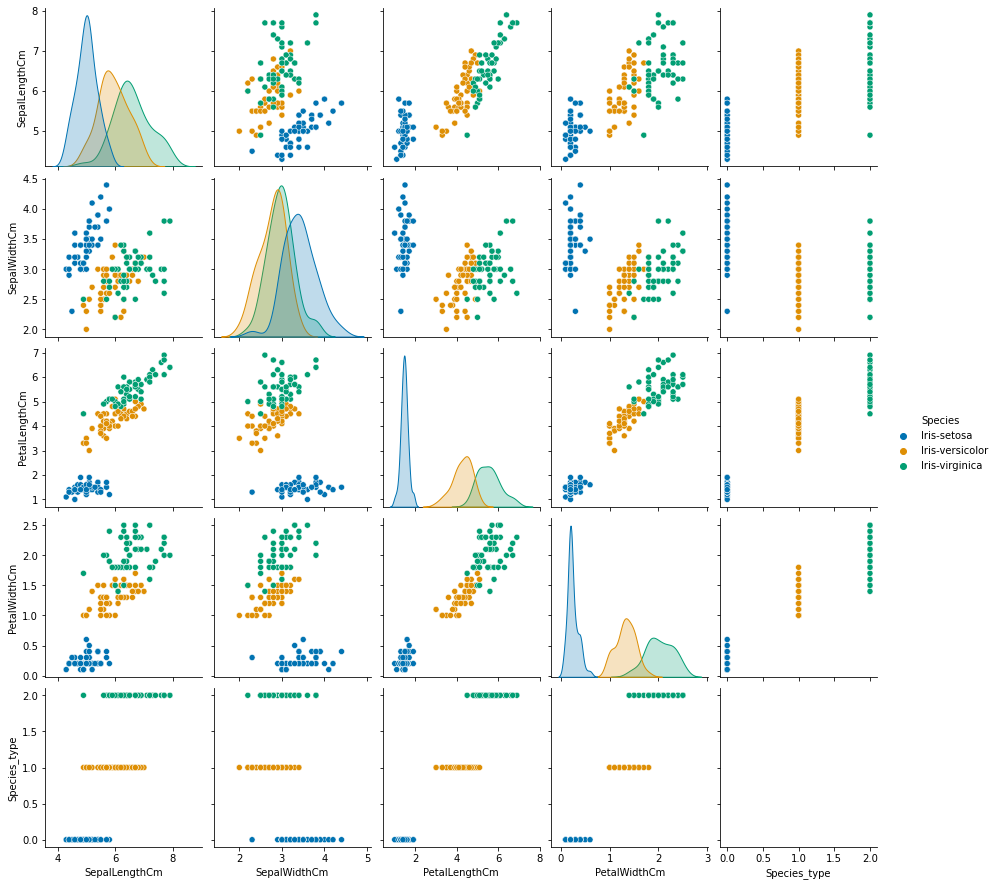

In [8]:
sns.pairplot(df,hue='Species',palette='colorblind')

### Scatter Plot

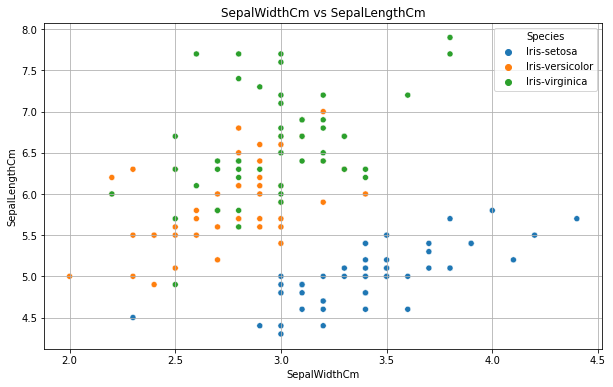

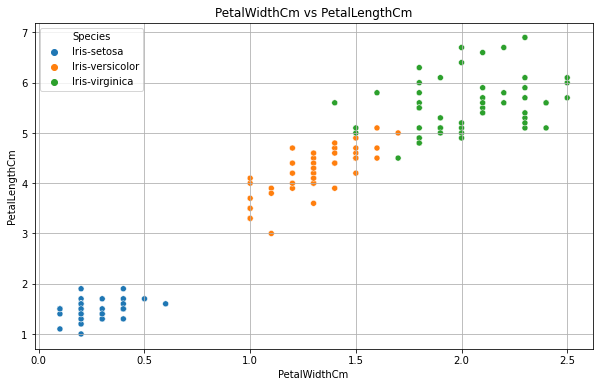

<Figure size 432x288 with 0 Axes>

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='SepalWidthCm',y='SepalLengthCm',hue='Species')
plt.title('SepalWidthCm'+" vs "+'SepalLengthCm')
plt.grid()
plt.show()
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='PetalWidthCm',y='PetalLengthCm',hue='Species')
plt.title('PetalWidthCm'+" vs "+'PetalLengthCm')
plt.grid()
plt.show()
plt.tight_layout()

### Correlation Heat Map

<AxesSubplot:>

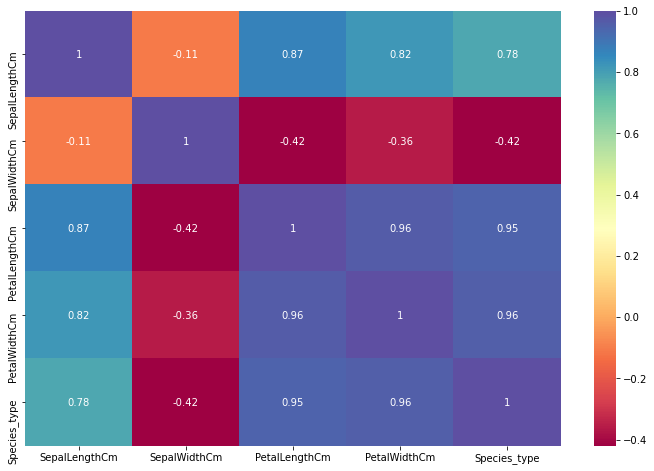

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.Spectral)

## Model Building

In [16]:
#train data size - 75%, test data size-25% 
X_train,X_test,Y_train,Y_test = train_test_split(df.drop(['Species_type','Species'],axis=1),df['Species_type'],test_size=0.25,random_state=12)

### Decision tree model

In [17]:
# hyper parameter tuning using Grid Search

parameters = {'max_depth':range(1,20)}
dtree = DecisionTreeClassifier(criterion = "gini")
tree = GridSearchCV(dtree, parameters, cv=5, scoring = "accuracy")
model = tree.fit(X_train, Y_train)
print('The best max depth value is', model.best_estimator_.get_params()['max_depth'])

The best max depth value is 3


In [18]:
#Building Model using best max depth value
model_dt = DecisionTreeClassifier(max_depth = 3,random_state=100)
model_dt.fit(X_train,Y_train)
y_train_pred=model_dt.predict(X_train)
y_test_pred=model_dt.predict(X_test)

# Model Performance
print('The accuracy on train data using DT is',"{:.3f}".format(metrics.accuracy_score(y_train_pred,Y_train)))
print('The accuracy on test data using DT is',"{:.3f}".format(metrics.accuracy_score(y_test_pred,Y_test)))

The accuracy on train data using DT is 0.973
The accuracy on test data using DT is 0.947


### K-Nearest Neighbors Model

In [21]:
#train data size - 75%, test data size-25% 
X_train,X_test,Y_train,Y_test = train_test_split(df.drop(['Species_type','Species'],axis=1),df['Species_type'],test_size=0.25,random_state=8)

In [22]:
def select_neighbors():
    knn_train_acc=[]
    knn_test_acc=[]
    for i in range(1,11):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,Y_train)
        y_pred_train = knn.predict(X_train)
        y_pred_test = knn.predict(X_test)
        knn_train_acc.append(accuracy_score(y_pred_train,Y_train))
        knn_test_acc.append(accuracy_score(y_pred_test,Y_test))
        
    return knn_train_acc,knn_test_acc

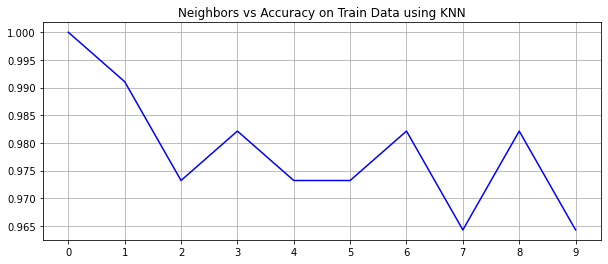

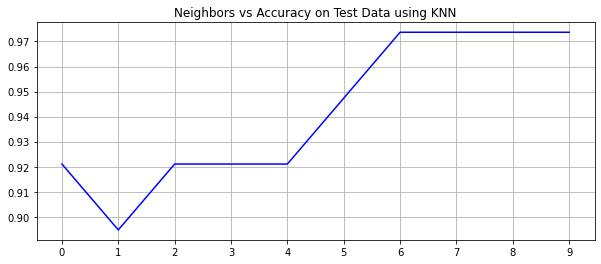

In [25]:
knn_train,knn_test = select_neighbors()
x = np.linspace(0,9,10)

plt.figure(figsize=(10,4))
plt.plot(x,knn_train,color='blue')
plt.title("Neighbors vs Accuracy on Train Data using KNN")
plt.xticks(x)
plt.grid()

plt.figure(figsize=(10,4))
plt.plot(x,knn_test,color='blue')
plt.title("Neighbors vs Accuracy on Test Data using KNN")
plt.xticks(x)
plt.grid()

Selecting n (neighbors) value to be 6 since both train and test accuracies are highest at that point

In [26]:
train_acc = np.round(knn_train[6],3)
test_acc = np.round(knn_test[6],3)

print("The Accuracy on train data using KNN: ",train_acc)
print("The Accuracy on test data using KNN: ",test_acc)

The Accuracy on train data using KNN:  0.982
The Accuracy on test data using KNN:  0.974
